## 1) Importing the libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import catboost as cb
from sklearn.ensemble import RandomForestRegressor

## 2) Importing the datasets

In [154]:
print('Loading training data...')
train_df = pd.read_csv('train.csv')
print('Loading testing data...')
test_df = pd.read_csv('test.csv')
print('Successful')

Loading training data...
Loading testing data...
Successful


## 3) Basic Data Exploration

#### 3a) Using head to see the first 10 rows

In [155]:
train_df.head(10)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
5,1921362,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
6,1921363,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
7,1921364,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
8,1921365,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
9,1921366,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


#### 3b) Checking for missing values

In [156]:
print(train_df.isnull().sum())

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64


### Observations:-
It seems that **EntryStreetName** and **ExitStreetName** seems to **have Null values** in them.

#### 3c) As all the missing values are street names, we cannot use probability imputation to replace them.
#### Thus, we drop the entries with Missing values

In [157]:
train = train_df.dropna()
print('\nUpdated\n')
print(train.isnull().sum())


Updated

RowId                      0
IntersectionId             0
Latitude                   0
Longitude                  0
EntryStreetName            0
ExitStreetName             0
EntryHeading               0
ExitHeading                0
Hour                       0
Weekend                    0
Month                      0
Path                       0
TotalTimeStopped_p20       0
TotalTimeStopped_p40       0
TotalTimeStopped_p50       0
TotalTimeStopped_p60       0
TotalTimeStopped_p80       0
TimeFromFirstStop_p20      0
TimeFromFirstStop_p40      0
TimeFromFirstStop_p50      0
TimeFromFirstStop_p60      0
TimeFromFirstStop_p80      0
DistanceToFirstStop_p20    0
DistanceToFirstStop_p40    0
DistanceToFirstStop_p50    0
DistanceToFirstStop_p60    0
DistanceToFirstStop_p80    0
City                       0
dtype: int64


### Observations:-
All the feaures and target seem to have no null values now.

#### 3d) Checking the columns with Numerical Data

In [158]:
numeric_columns = train._get_numeric_data().columns
print("Numerical Columns:",'\n', numeric_columns)

Numerical Columns: 
 Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'Hour', 'Weekend',
       'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80'],
      dtype='object')


#### 3e) Checking the columns with Categorical Data

In [159]:
categorical_columns = list(set(train.columns) - set(numeric_columns))
print("\n\nCategorical Columns:",'\n', categorical_columns)



Categorical Columns: 
 ['EntryHeading', 'Path', 'ExitHeading', 'ExitStreetName', 'City', 'EntryStreetName']


## 4) Exploratory Data Analysis(EDA)

In the EDA part of the notebook, we will be exploring four main plots. They are listed below:
* a) Streets with top waiting times and Box plot for total wait time for each city
* b) Correlation Heat Map
* c) Frequency plot for type of roadways used
* d) Traffic Density Plots for each city
* e) Scatter plots for Time Stopped Distribution
* f) Correlation Heat Map for Target Variables
* g) Violin plot for Time Stopped Target Variables

### 4.a) Streets with top waiting times and Box plot for total wait time for each city

#### Steps: 
i) We first get the unqiue cities in the dataset
\
ii) We then create separate datasets for each city and add a column for the total wait time in that city
\
iii) This is followed by creating the plots and printing the names of the cities with the highest wait times.

In [160]:
#Step I
train.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [161]:
#Step II
Atlanta=train[train['City']=='Atlanta']
Boston=train[train['City']=='Boston']
Chicago=train[train['City']=='Chicago']
Philadelphia=train[train['City']=='Philadelphia']

#Function to calculate total wait times
def total_wait_time(city):
    city['Total_wait_time'] = city['TotalTimeStopped_p20'] + city['TotalTimeStopped_p40'] + city['TotalTimeStopped_p50'] + city['TotalTimeStopped_p60'] + city['TotalTimeStopped_p80']
    
# Adding new column
total_wait_time(Atlanta)
total_wait_time(Boston)
total_wait_time(Chicago)
total_wait_time(Philadelphia)

<ipython-input-161-2b72d3b596f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['Total_wait_time'] = city['TotalTimeStopped_p20'] + city['TotalTimeStopped_p40'] + city['TotalTimeStopped_p50'] + city['TotalTimeStopped_p60'] + city['TotalTimeStopped_p80']



Highest Traffic street in Atlanta



EntryStreetName
Worcester Drive NE           857.333333
Springdale Road Northeast    325.666667
Hardee Street Northeast      291.307692
Faith Avenue Southeast       275.520000
East Wesley Road             272.655172
Lakeshore Drive Northeast    260.669492
Piedmont Circle Northeast    252.242938
Martin Street Southeast      241.827586
Huff Road Northwest          232.241379
Centre Parkway               224.589744
Name: Total_wait_time, dtype: float64

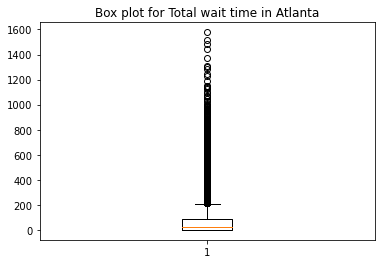

In [162]:
#Step III for Atlanta
plt.boxplot(Atlanta['Total_wait_time'])
plt.title('Box plot for Total wait time in Atlanta')
np.mean(Atlanta['Total_wait_time'])
print('\nHighest Traffic street in Atlanta\n')
Atlanta.groupby('EntryStreetName')['Total_wait_time'].mean().sort_values(ascending=False).head(10)

### Observations:-

It seems that a lot of outliers are present in the total wait time of the vehicles in Atlanta.
The above visualisation represents the top 10 highest traffic streets in the City of Atlanta.
**Worcester Drive NE** seems to have the **highest waiting time**. It may be because of the fact that these streets are being used by most of the commuters for their daily commute.


Highest Traffic street in Boston



EntryStreetName
Ellet Street          711.000000
Faulkner Street       643.000000
Tower Street          417.500000
Louis Prang Street    380.093750
Ceylon Street         293.888889
Parker Hill Avenue    293.066667
Francis Street        292.525424
Mission Park Drive    287.666667
Copeland Street       280.333333
Corinth Street        275.161290
Name: Total_wait_time, dtype: float64

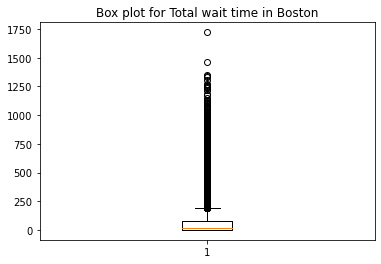

In [163]:
#Step III for Boston
plt.boxplot(Boston['Total_wait_time'])
plt.title('Box plot for Total wait time in Boston')
np.mean(Boston['Total_wait_time'])
print('\nHighest Traffic street in Boston\n')
Boston.groupby('EntryStreetName')['Total_wait_time'].mean().sort_values(ascending=False).head(10)

### Observations:-

It seems that a lot of outliers are present in the total wait time of the vehicles in Boston.
The above visualisation represents the top 10 highest traffic streets in the City of Boston.
**Ellen Street** seems to have the **highest waiting time**. It may be because of the fact that these streets are being used by most of the commuters for their daily commute.


Highest Traffic street in Chicago



EntryStreetName
South State Road         486.166667
West 27th Street         446.000000
West 66th Street         381.000000
West 41st Street         314.555556
West 73rd Street         297.053571
North Marine Drive       289.000000
Southwest Highway        267.208333
North Campbell Avenue    215.625000
West 40th Street         212.000000
East Hayes Drive         187.000000
Name: Total_wait_time, dtype: float64

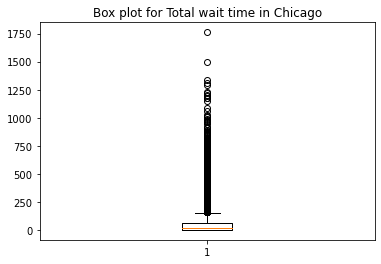

In [164]:
#Step III for Chicago
plt.boxplot(Chicago['Total_wait_time'])
plt.title('Box plot for Total wait time in Chicago')
np.mean(Chicago['Total_wait_time'])
print('\nHighest Traffic street in Chicago\n')
Chicago.groupby('EntryStreetName')['Total_wait_time'].mean().sort_values(ascending=False).head(10)

### Observations:-

It seems that a lot of outliers are present in the total wait time of the vehicles in Chicago. 
The above visualisation represents the top 10 highest traffic streets in the City of Chicago. 
**South State Street** seems to have the **highest waiting time**. It may be because of the fact that these streets are being used by most of the commuters for their daily commute.


Highest Traffic street in Philadelphia



EntryStreetName
Falls Bridge               474.769231
West Diamond Street        274.835294
Florence Avenue            261.181818
North 43rd Street          258.000000
West Cumberland Street     203.156250
Battersby Street           196.500000
West Susquehanna Avenue    194.550000
West Dauphin Street        191.354098
South Darien Street        191.126866
Marlborough Street         183.400000
Name: Total_wait_time, dtype: float64

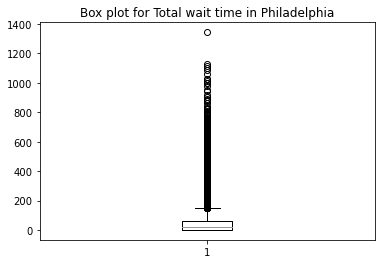

In [165]:
#Step III for Philadelphia
plt.boxplot(Philadelphia['Total_wait_time'])
plt.title('Box plot for Total wait time in Philadelphia')
np.mean(Philadelphia['Total_wait_time'])
print('\nHighest Traffic street in Philadelphia\n')
Philadelphia.groupby('EntryStreetName')['Total_wait_time'].mean().sort_values(ascending=False).head(10)

### Observations:-

It seems that a lot of outliers are present in the total wait time of the vehicles in Philadelphia. 
The above visualisation represents the top 10 highest traffic streets in the City of Philadelphia. 
**Falls Bridge** seems to have the **highest waiting time**. It may be because of the fact that these streets are being used by most of the commuters for their daily commute.

### 4.b) Correlation heatmap

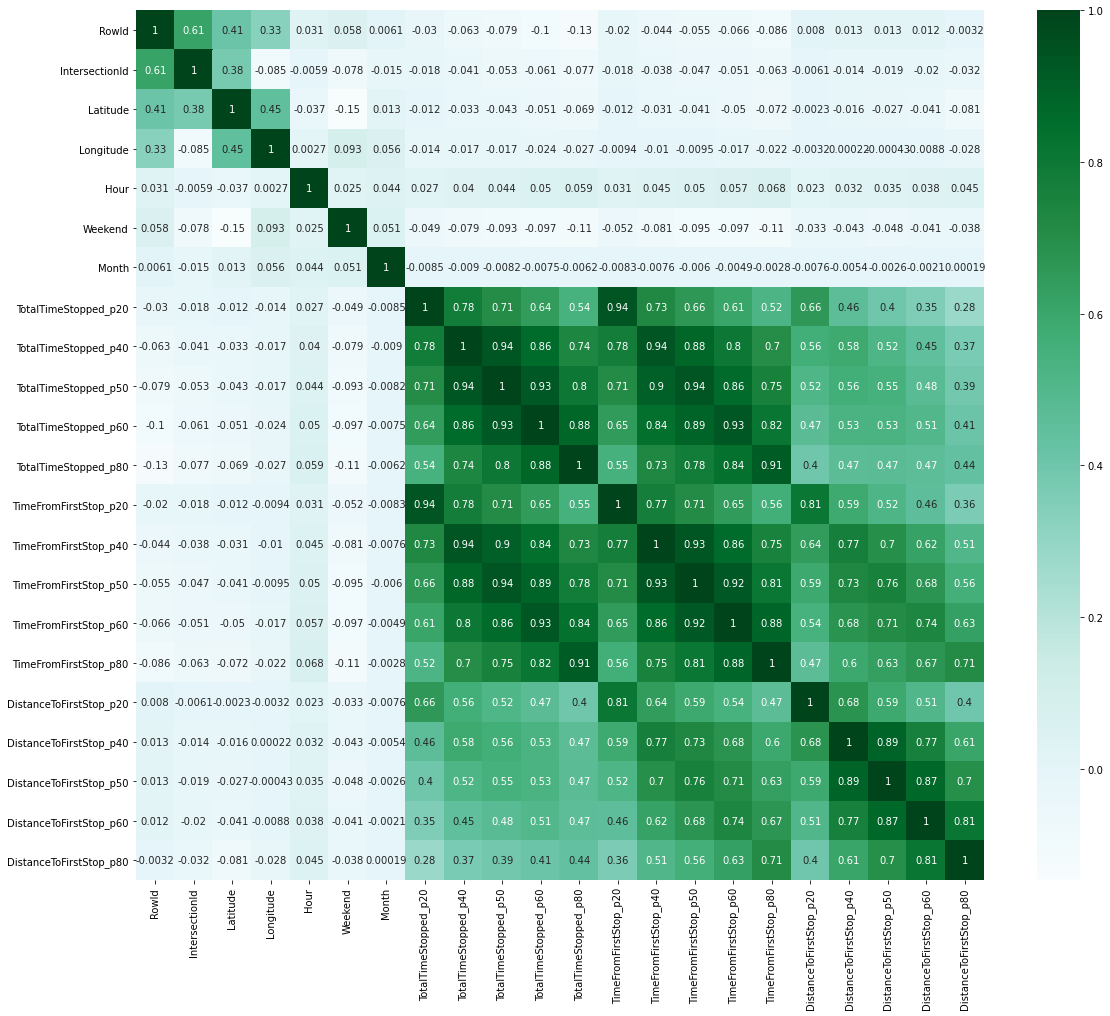

In [166]:
plt.figure(figsize=(19,16))
sns.heatmap(train_df.corr(),annot=True, cmap=plt.cm.BuGn)
plt.show()

### Observations:-

From the above Correlation plot, it is quite clear that there **does not exist any significant corelation between the independent features and the Target variable**.

### 4.c) Frequency plot for type of roadways used

Steps:
\
i) We first create a list of all the different types of roadways.
\
ii) This is followed by getting the frequency for each type of roadway.
\
iii) Creating the different kinds of plots.

In [167]:
#Step I:
roadways = ['Street', 'Road', 'Boulevard', 'Avenue', 'Lane', 'Drive', 'Parkway', 'Place', 'Way', 
            'Circle', 'Highway', 'Pkwy', 'St', 'Connector', 'Broadway', 'Overpass', 'Ave', 'Square', 
            'Tunner', 'Rd', 'Bld', 'Bridge', 'Expressway', 'Pike']
to_longform = {'Rd': 'Road', 'Bld': 'Boulevard', 'Ave': 'Avenue', 'St': 'Street', 'Pkwy': 'Parkway'}
street_names = pd.concat([train['EntryStreetName'], train['ExitStreetName']], ignore_index=True).dropna()

In [168]:
#Step II:
def to_roadway(StreetName):
    if pd.isnull(StreetName):
        return 'Other'
    for roadway in roadways:
        if roadway in StreetName:
            if roadway in to_longform:
                return to_longform[roadway]
            else:
                return roadway
    return 'Other'

/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


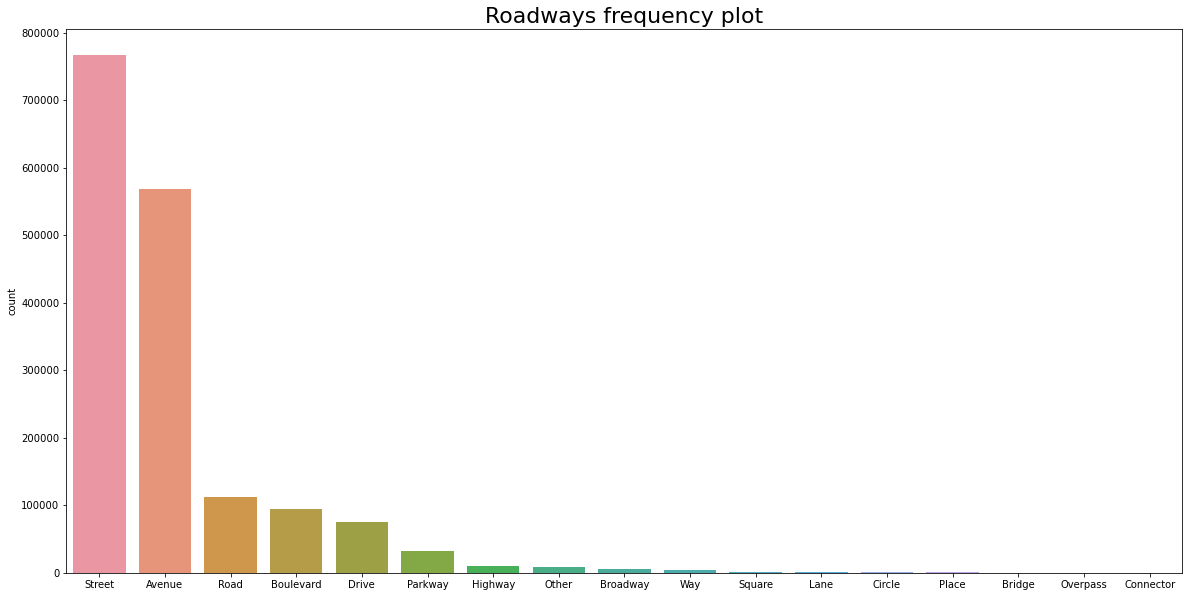

In [169]:
#Step III: Roadways Frequency Plot
both_roadway = street_names.apply(to_roadway)
plt.figure(figsize=(20,10))
plt.title('Roadways frequency plot', fontsize = 22)
sns.countplot(both_roadway, order=both_roadway.value_counts().index);

### Observations:-

Most of the Paths that the commuters undertake across all the 4 cities have the name **Street** and **Avenue** associated with them.
\
**Connector** Paths are the least used by the commuters.

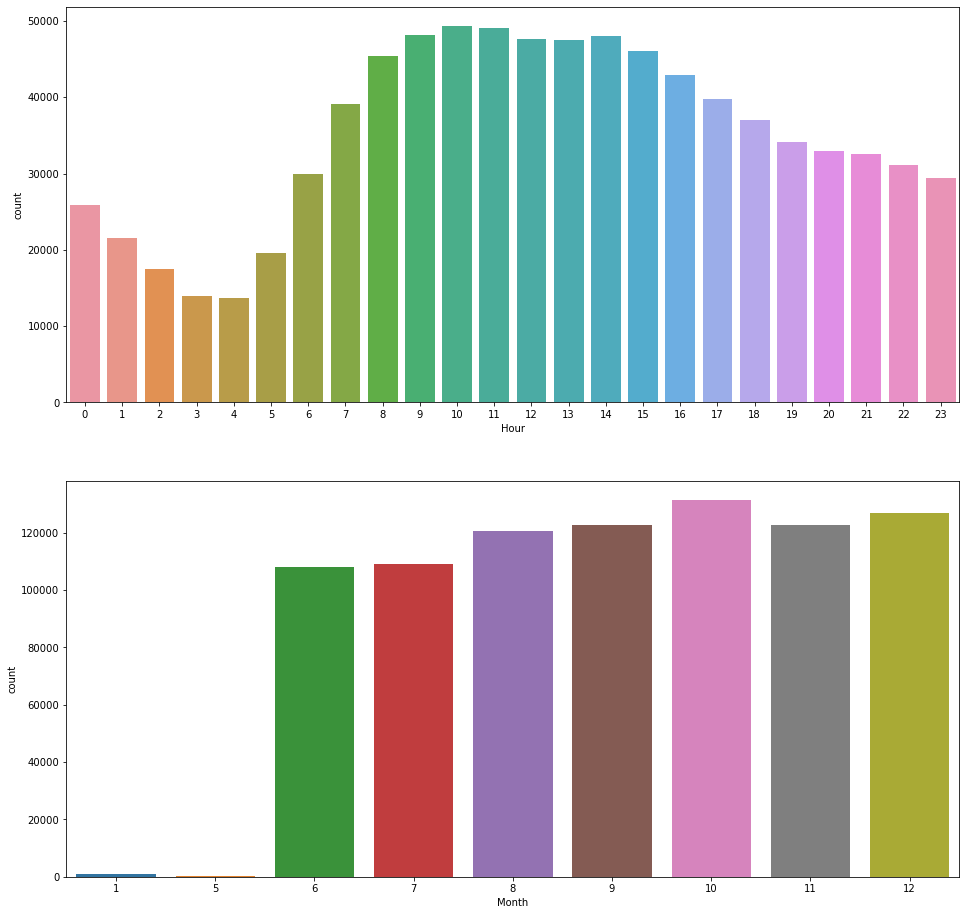

In [170]:
#Step III: Plots for Count vs Hour of Day and Count vs Month of the Year
fig, ax = plt.subplots(nrows =2, ncols=1, figsize=(16,16))
sns.countplot(x='Hour', data=train, ax=ax[0]);
sns.countplot(x='Month', data=train, ax=ax[1]);

### Observations:-

From the **Hour** and **Count** graph we can fairly conclude the following:-
1. **From Hour 08:00 AM till 17:00 PM, we have the highest traffic across all the four cities**. This well may be because of the fact that this timeframe basically corresponds to the Office hour across all the Cities

2. **From Hour 02:00 AM till 05:00 AM, we have the least traffic across all the four cities**.

3. **From 18:00 PM till 00:00 AM, we have mediocre traffic across all the four cities**. This well may be because of the fact that in this timeframe most of the traffic are being caused by commuters who are looking to get to places for a leisure get-away.

From **Month** and **Count** graph we can fairly decipher the following:-

1. In the Month of **October**, we have the **highest traffic across all the cities**, closely followed by December.

2. In the Month of **January** we have the **lowest traffic across all the 4 cities**.

3. **August, September and November** seem to have **nearly equal traffic acorss all the 4 cities**.

4. **June and July** seem to have **nearly equal traffic across all the 4 cities**.

### 4.d) Generating Traffic Density Plots for each city

For this scenario we have done the follwing:-

1. For the first histogram we have plotted the Count of Traffic Density of every streets for every city. 
Here '0' represents the Count of 'Low Traffic Density' streets and '1' represents 'High Traffic Density' streets of each city.

For example:- In Boston, there are around 240 streets which have low traffic density and around 340 streets which have High traffic density.
The assumption over here is that, if the average 'Total Waiting Time' of all the streets of a particular city is 'X' and the average 'Total Waiting time' of a street in a particular city is 'X1', then:-
If X1 < X then, the Street of that particular City will constitute as a count of one of the Low Density Street of that City.
If X1 > X then, the Street of that particular City will constitute as a count of one of the High Density Street of that City.

So, basically for every street of every City we have calculated the 'Average total waiting time' and compared the same to the 'Average total waiting time' of all the streets in that particular City.

2. For the second histogram we have shown the distribution of the Total waiting time for every City.
All the distributions of every City is found out to be Right skewed. Which basically tells us their are extreme values and outliers present in the total waiting time of every city. The outliers are present in the direction of the skewness.

In [171]:
Atlanta_Street_Name = Atlanta.groupby(['EntryStreetName'])[['Total_wait_time','EntryStreetName']].mean()
Chicago_Street_Name = Chicago.groupby(['EntryStreetName'])[['Total_wait_time','EntryStreetName']].mean()
Boston_Street_Name = Boston.groupby(['EntryStreetName'])[['Total_wait_time','EntryStreetName']].mean()
Philadelphia_Street_Name =Philadelphia.groupby(['EntryStreetName'])[['Total_wait_time','EntryStreetName']].mean()



Atlanta_mean=Atlanta['Total_wait_time'].mean()
Boston_mean=Boston['Total_wait_time'].mean()
Chicago_mean=Chicago['Total_wait_time'].mean()
Philadelphia_mean=Philadelphia['Total_wait_time'].mean()

for col_name, data in Atlanta_Street_Name.items():
    x = data[data<Atlanta_mean].index
    
for col_name, data in Chicago_Street_Name.items():
    xx = data[data<Chicago_mean].index
    
for col_name, data in Boston_Street_Name.items():
    low = data[data<Boston_mean].index
    
for col_name, data in Philadelphia_Street_Name.items():
    lowest = data[data<Philadelphia_mean].index
    
Atlanta_Street_Name['Traffic Density'] =list(np.ones(len(Atlanta_Street_Name))) 
Atlanta_Street_Name['Traffic Density'][x] = 0


Chicago_Street_Name['Traffic Density'] =list(np.ones(len(Chicago_Street_Name))) 
Chicago_Street_Name['Traffic Density'][xx] = 0


Boston_Street_Name['Traffic Density'] =list(np.ones(len(Boston_Street_Name))) 
Boston_Street_Name['Traffic Density'][low] = 0


Philadelphia_Street_Name['Traffic Density'] =list(np.ones(len(Philadelphia_Street_Name))) 
Philadelphia_Street_Name['Traffic Density'][lowest] = 0


[Text(0.5, 1.0, 'Philadelphia')]

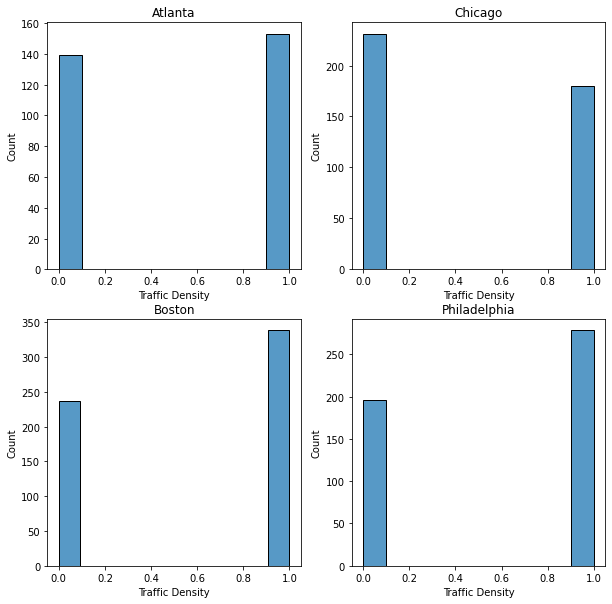

In [172]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=Atlanta_Street_Name, x="Traffic Density", kde=False, ax=axs[0, 0]).set(title='Atlanta')
sns.histplot(data=Chicago_Street_Name, x="Traffic Density", kde=False, ax=axs[0, 1]).set(title='Chicago')
sns.histplot(data=Boston_Street_Name, x="Traffic Density", kde=False, ax=axs[1, 0]).set(title='Boston')
sns.histplot(data=Philadelphia_Street_Name, x="Traffic Density", kde=False, ax=axs[1,1]).set(title='Philadelphia')

### Observations:-

For **Atlanta, Boston, and Philadelphia** we can see that there are **more streets** which have **high traffic density** as compared to that of Low traffic density.
For **Chicago**, we can see that there are **more streets** which have **low traffic density** as compared to that of High traffic density.
So, Chicago is the only city which has more streets where the Traffic density is lower as compared to other cities.

[Text(0.5, 1.0, 'Philadelphia')]

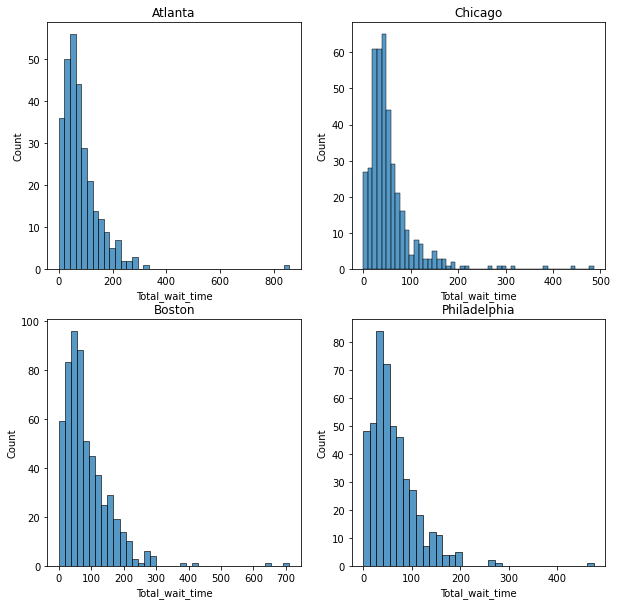

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=Atlanta_Street_Name, x="Total_wait_time", kde=False, ax=axs[0, 0]).set(title='Atlanta')
sns.histplot(data=Chicago_Street_Name, x="Total_wait_time", kde=False, ax=axs[0, 1]).set(title='Chicago')
sns.histplot(data=Boston_Street_Name, x="Total_wait_time", kde=False, ax=axs[1, 0]).set(title='Boston')
sns.histplot(data=Philadelphia_Street_Name, x="Total_wait_time", kde=False, ax=axs[1,1]).set(title='Philadelphia')

### Observations:-

All the distributions seem to be **Right skewed** with the **outliers arranged in the direction of skewness**.

### 4.e) Scatter plots for Time Stopped Distribution

As we know, the target variables are:
* TotalTimeStopped_p20
* TotalTimeStopped_p50
* TotalTimeStopped_p80
* DistanceToFirstStop_p20
* DistanceToFirstStop_p50
* DistanceToFirstStop_p80

Scatter plots are plotted for each of the time variables to see their distribution.

In [174]:
time_stopped = ['TotalTimeStopped_p20',
             'TotalTimeStopped_p50', 
             'TotalTimeStopped_p80']

distance_to_stop = ['DistanceToFirstStop_p20',
                   'DistanceToFirstStop_p50',
                   'DistanceToFirstStop_p80']

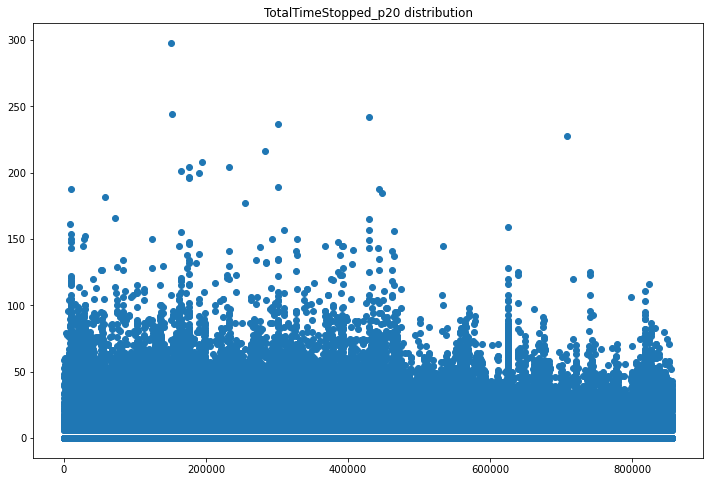

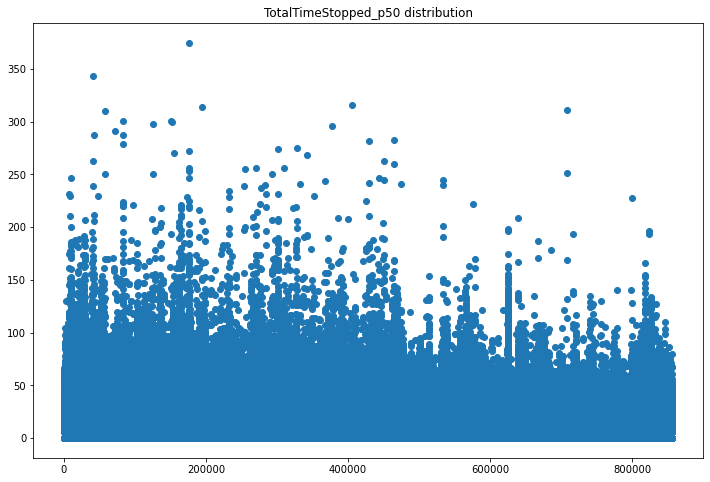

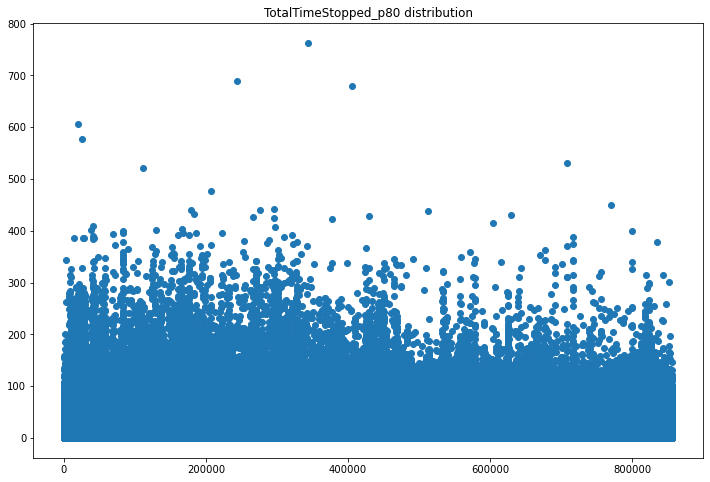

In [175]:
for i in time_stopped:
    plt.figure(figsize = (12, 8))
    plt.scatter(train.index,train[i])
    plt.title('{} distribution'.format(i))

### Observations:-

Pretty standard distribution for all the dependent variables such as  'TotalTimeStopped_p20','TotalTimeStopped_p50' and 'TotalTimeStopped_p80'.

### 4.f) Correlation Heat Map for Target Variables

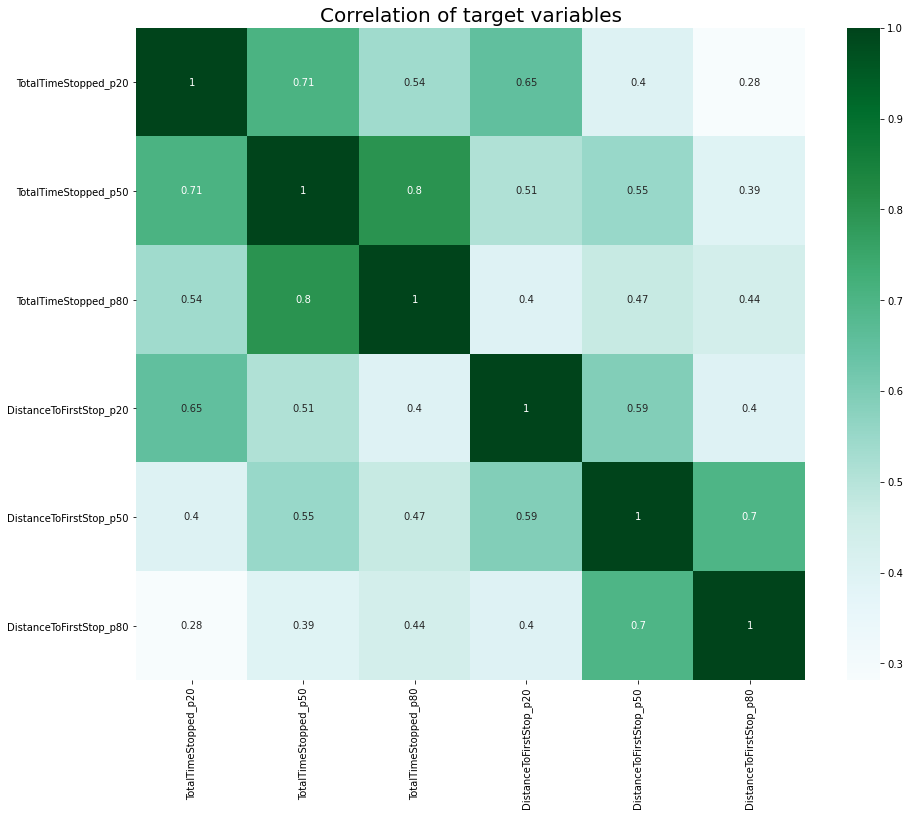

In [176]:
plt.figure(figsize=(15,12))
plt.title('Correlation of target variables', fontsize = 20)
sns.heatmap(train[time_stopped + distance_to_stop].corr(),
            annot=True, cmap=plt.cm.BuGn)
plt.show()
# Reference: https://www.kaggle.com/code/kabure/insightful-eda-modeling-lgbm-hyperopt/notebook

### Observations:-

There seems to be a **strong corelation** between **'TotalTimeStopped_p50' with 'TotalTimeStopped_p20' and 'TotalTimeStopped_p80'**.

There seems to be a **strong corelation between 'TotalTimeStopped_p80' with 'TotalTimeStopped_p50'**.
There seems to be a **strong corelation between 'DistancetoFirstStop_p50' with 'DistancetoFirstStop_p80'**.
There seems to be a **strong corelation between 'DistancetoFirstStop_p50' with 'DistancetoFirstStop_p80'**.



### 4.g) Violin Plots for Time Stopped Target Variables

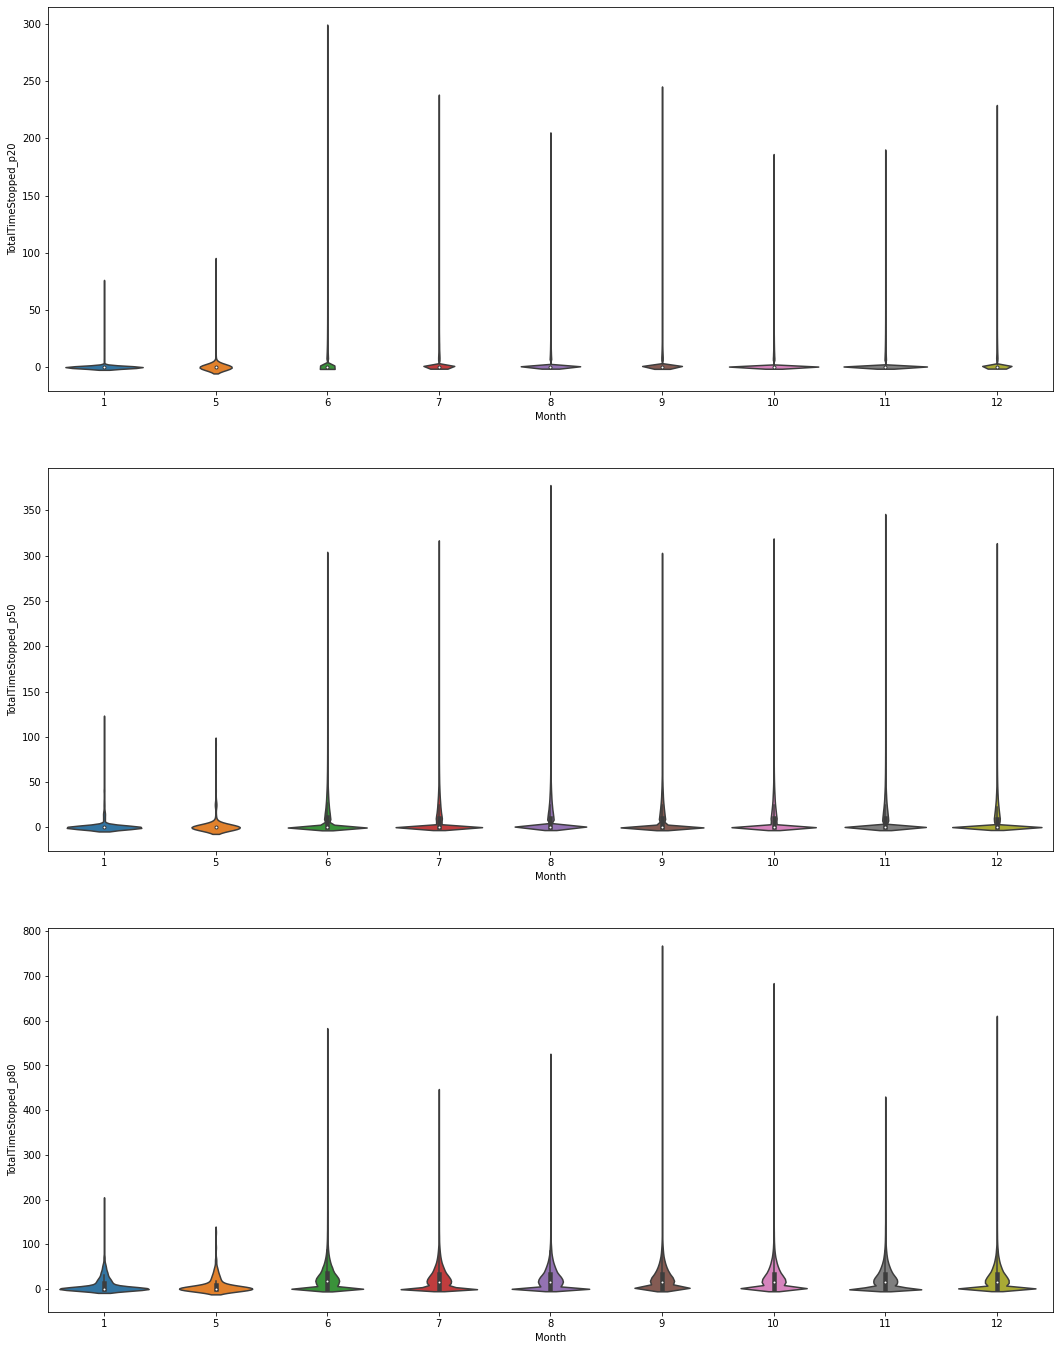

In [177]:
fig, ax = plt.subplots(nrows = 3, ncols=1, figsize=(18,24))
sns.violinplot(x='Month', y='TotalTimeStopped_p20', data=train, ax=ax[0]);
sns.violinplot(x='Month', y='TotalTimeStopped_p50', data=train, ax=ax[1]);
sns.violinplot(x='Month', y='TotalTimeStopped_p80', data=train, ax=ax[2]);

## 5) Baseline Methods

We will be using two baseline methods:
* a) **CatBoost Regression**
* b) **Random Forest Regression**

### 5.a) Baseline Method 1 - Catboost Regression

#### 5.a.i) Re-importing the datasets

In [178]:
# Reference for Encoding and parameter tuning: https://www.kaggle.com/code/pradeepmuniasamy/comparative-study-of-models-geotab-inertsection#Modelling
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#### 5.a.ii) Creating Dummies for training and testing data

In [179]:
#Creating Dummies for train Data
dfen = pd.get_dummies(train_df["EntryHeading"],prefix = 'en')
dfex = pd.get_dummies(train_df["ExitHeading"],prefix = 'ex')
train_df = pd.concat([train_df,dfen],axis=1)
train_df = pd.concat([train_df,dfex],axis=1)

#Creating Dummies for test Data
dfent = pd.get_dummies(test_df["EntryHeading"],prefix = 'en')
dfext = pd.get_dummies(test_df["ExitHeading"],prefix = 'ex')
test_df = pd.concat([test_df,dfent],axis=1)
test_df = pd.concat([test_df,dfext],axis=1)

#### 5.a.iii) Creating the training data

In [180]:
X = train_df[["IntersectionId","Hour","Weekend","Month",'en_E',
       'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW', 'en_W', 'ex_E',
       'ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]
y1 = train_df["TotalTimeStopped_p20"]
y2 = train_df["TotalTimeStopped_p50"]
y3 = train_df["TotalTimeStopped_p80"]
y4 = train_df["DistanceToFirstStop_p20"]
y5 = train_df["DistanceToFirstStop_p50"]
y6 = train_df["DistanceToFirstStop_p80"]

testX = test_df[["IntersectionId","Hour","Weekend","Month",'en_E','en_N', 'en_NE', 'en_NW', 'en_S', 
              'en_SE', 'en_SW', 'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]

#### 5.a.iv) Creating the Model

In [181]:
RMSE_b1 = []
def catboost(X,Y):
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    catboost_model = cb.CatBoostRegressor(
                              learning_rate=0.1,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
    catboost_model.fit(X_train, y_train)
    pred_catboost = catboost_model.predict(X_validate)
    return sqrt(mean_squared_error(y_validate, pred_catboost))    

#### 5.a.v) Fitting the model and making the predictions

In [182]:
outcome = [y1,y2,y3,y4,y5,y6]
for i in range(len(outcome)):
    RMSE = catboost(X,outcome[i])
    RMSE_b1.append(RMSE)

0:	learn: 7.1637827	total: 65.1ms	remaining: 1m 5s
75:	learn: 6.8211656	total: 3.02s	remaining: 36.7s
150:	learn: 6.6819676	total: 5.79s	remaining: 32.5s
225:	learn: 6.5792100	total: 8.63s	remaining: 29.5s
300:	learn: 6.4918800	total: 11.6s	remaining: 26.9s
375:	learn: 6.4138130	total: 14.4s	remaining: 24s
450:	learn: 6.3488310	total: 17.3s	remaining: 21.1s
525:	learn: 6.2921181	total: 20.2s	remaining: 18.2s
600:	learn: 6.2380817	total: 23s	remaining: 15.2s
675:	learn: 6.1890142	total: 25.7s	remaining: 12.3s
750:	learn: 6.1476405	total: 28.6s	remaining: 9.5s
825:	learn: 6.1103944	total: 31.5s	remaining: 6.63s
900:	learn: 6.0743989	total: 34.2s	remaining: 3.76s
975:	learn: 6.0389955	total: 36.9s	remaining: 908ms
999:	learn: 6.0294781	total: 37.8s	remaining: 0us
0:	learn: 15.6346852	total: 39ms	remaining: 38.9s
75:	learn: 14.4308729	total: 2.83s	remaining: 34.5s
150:	learn: 14.0646210	total: 5.68s	remaining: 31.9s
225:	learn: 13.7909233	total: 8.57s	remaining: 29.3s
300:	learn: 13.572304

#### 5.a.vi) Plotting the resutls

[6.395306245767643, 12.97527200860371, 23.04789310216402, 27.594496469532345, 65.61512899023397, 130.68646722447534]

Mean RMSE:  44.38576067346284


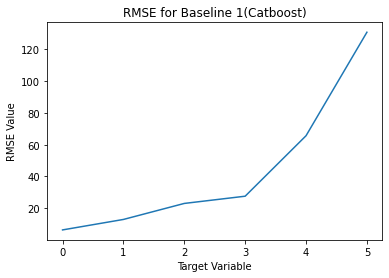

In [183]:
print(RMSE_b1)
print("\nMean RMSE: ", np.mean(RMSE_b1))
plt.plot(RMSE_b1)
plt.title('RMSE for Baseline 1(Catboost)')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()

### 5.b) Baseline Method 2 - Random Forest Regression

#### 5.b.i) Creating the Random Forest Regression Model

In [184]:
RMSE_b2 = []
def randomforest(X,Y):
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 23)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_validate)
    return sqrt(mean_squared_error(y_validate, y_pred))

#### 5.b.ii) Fitting the model and making the predictions

In [185]:
outcome = [y1,y2,y3,y4,y5,y6]
for i in range(len(outcome)):
    RMSE = randomforest(X,outcome[i])
    RMSE_b2.append(RMSE)    

#### 5.b.iii) Plotting the results

[6.427704758202294, 11.858943943670825, 20.495608790598382, 28.405763446555603, 61.97514690397094, 110.59561943366377]

Mean RMSE:  39.959797879443634


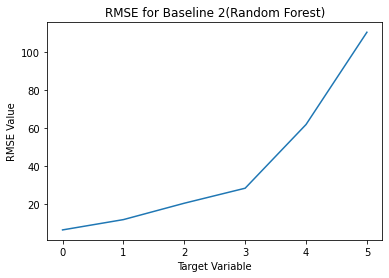

In [186]:
print(RMSE_b2)
print("\nMean RMSE: ", np.mean(RMSE_b2))
plt.plot(RMSE_b2)
plt.title('RMSE for Baseline 2(Random Forest)')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()

## 6) Proposed Method

The method that we propose contains two main steps:
* i) **Clustering and getting cluster labels based on the input data**
* ii) **Adding cluster labels to the input parameters and then retraining the regression model**

#### 6.a) Reimporting the datasets

In [187]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#### 6.b) Creating dummy variables

In [188]:
def get_dummy(df,column):
    df_dummy = pd.get_dummies(df[column], prefix=f'cat{column}')
    return df_dummy

#### 6.c) Encoding the necessary columns

In [189]:
needs_encoding = ['EntryHeading','ExitHeading']
for i in needs_encoding:
    encode = get_dummy(train_df,i)
    test_encode = get_dummy(test_df,i)
    train_df = pd.concat([train_df, encode], axis=1)
    test_df = pd.concat([test_df, encode], axis=1)

In [190]:
Atlanta_train = train_df[train_df['City']=='Atlanta']
Boston_train = train_df[train_df['City']=='Boston']
Chicago_train = train_df[train_df['City']=='Chicago']
Philadelphia_train = train_df[train_df['City']=='Philadelphia']

#### 6.d) Dropping the unnecessary columns and assigning each target variable to a different dataframe

In [191]:
model_not_X = ['RowId','EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Weekend',
       'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City']   

In [192]:
Atlanta_X = Atlanta_train.drop(model_not_X, axis = 1)
Atlanta_y1 = Atlanta_train["TotalTimeStopped_p20"]
Atlanta_y2 = Atlanta_train["TotalTimeStopped_p50"]
Atlanta_y3 = Atlanta_train["TotalTimeStopped_p80"]
Atlanta_y4 = Atlanta_train["DistanceToFirstStop_p20"]
Atlanta_y5 = Atlanta_train["DistanceToFirstStop_p50"]
Atlanta_y6 = Atlanta_train["DistanceToFirstStop_p80"]

In [193]:
Boston_X = Boston_train.drop(model_not_X, axis = 1)
Boston_y1 = Boston_train["TotalTimeStopped_p20"]
Boston_y2 = Boston_train["TotalTimeStopped_p50"]
Boston_y3 = Boston_train["TotalTimeStopped_p80"]
Boston_y4 = Boston_train["DistanceToFirstStop_p20"]
Boston_y5 = Boston_train["DistanceToFirstStop_p50"]
Boston_y6 = Boston_train["DistanceToFirstStop_p80"]

In [194]:
Chicago_X = Chicago_train.drop(model_not_X, axis = 1)
Chicago_y1 = Chicago_train["TotalTimeStopped_p20"]
Chicago_y2 = Chicago_train["TotalTimeStopped_p50"]
Chicago_y3 = Chicago_train["TotalTimeStopped_p80"]
Chicago_y4 = Chicago_train["DistanceToFirstStop_p20"]
Chicago_y5 = Chicago_train["DistanceToFirstStop_p50"]
Chicago_y6 = Chicago_train["DistanceToFirstStop_p80"]

In [195]:
Philadelphia_X = Philadelphia_train.drop(model_not_X, axis = 1)
Philadelphia_y1 = Philadelphia_train["TotalTimeStopped_p20"]
Philadelphia_y2 = Philadelphia_train["TotalTimeStopped_p50"]
Philadelphia_y3 = Philadelphia_train["TotalTimeStopped_p80"]
Philadelphia_y4 = Philadelphia_train["DistanceToFirstStop_p20"]
Philadelphia_y5 = Philadelphia_train["DistanceToFirstStop_p50"]
Philadelphia_y6 = Philadelphia_train["DistanceToFirstStop_p80"]

#### 6.e) Defining a method to return the clustering labels

We will be using DBSCAN() to cluster the datapoints. Here we define a method which uses DBSCAN to cluster the data and then return the cluster labels

In [196]:
def clustering(data):
    model = DBSCAN(eps=0.9)
    model.fit(data)
    return model.labels_

#### 6.f) Defining a method which incoorporates clustering with random forest regression and returns the top 5 features.

Here, we define a method which would:
\
i) Use the clustering method to produce the cluster labels
\
ii) Use th cluster labels with the input parameters to train a random forest regressor
\
iii) Creating a plot which shows the top 5 important features

In [197]:
def clustering_plus_randomforest_with_feature_importance(X, Y):
    clustering_variables = ['Latitude', 'Longitude','Hour','Month']
    clustering_model_data = X.loc[:,clustering_variables]
    labels = clustering(clustering_model_data)
    X["clusteringlabel"] = labels
    
    #Creating the training and test sets
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    
    #Creating the random forest regressor object
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 23)

    #Fitting the regressor with training data
    regressor.fit(X_train, y_train)
    
    #Making predictions for the testing data
    y_pred = regressor.predict(X_validate)

    #Printing the RSME value
    print('RMSE:' + str(sqrt(mean_squared_error(y_validate, y_pred))))
    
    #Creating a plot which shows the top 5 important features
    feat_importances = pd.Series(regressor.feature_importances_, index= X.columns)
    Top_5 = pd.DataFrame(feat_importances).reset_index().sort_values(0,ascending=False).iloc[:5,:]
    plt.figure(figsize=(10,10))
    g = sns.barplot(0,"index",data = Top_5, palette="viridis",orient = 'h')
    g.set_xlabel("Feature Importance")
    g.set_ylabel("Features")
    g = g.set_title("Top 5 Important Features")

#### 6.g) Implementing the clustering_plus_randomforest_with_feature_importance method for each city to see whether clustering label is within the top 5 features or no

RMSE:6.7164642590201415


/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


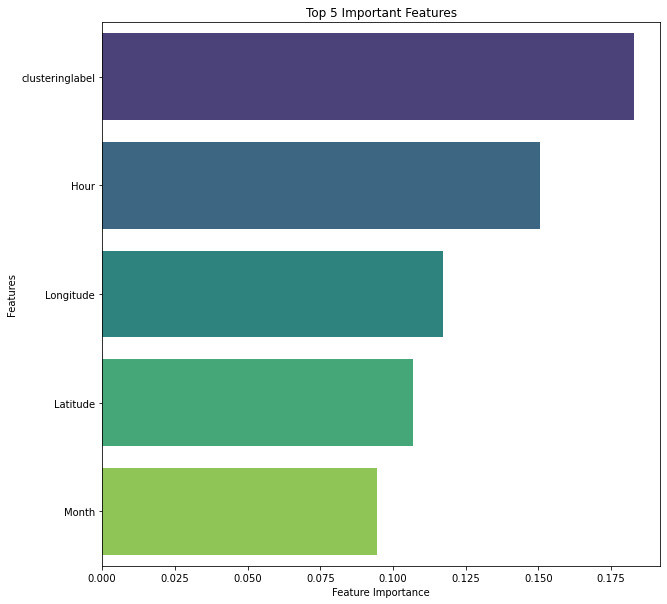

In [198]:
#Boston
clustering_plus_randomforest_with_feature_importance(Boston_X, Boston_y1)

RMSE:7.154272927914998


/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


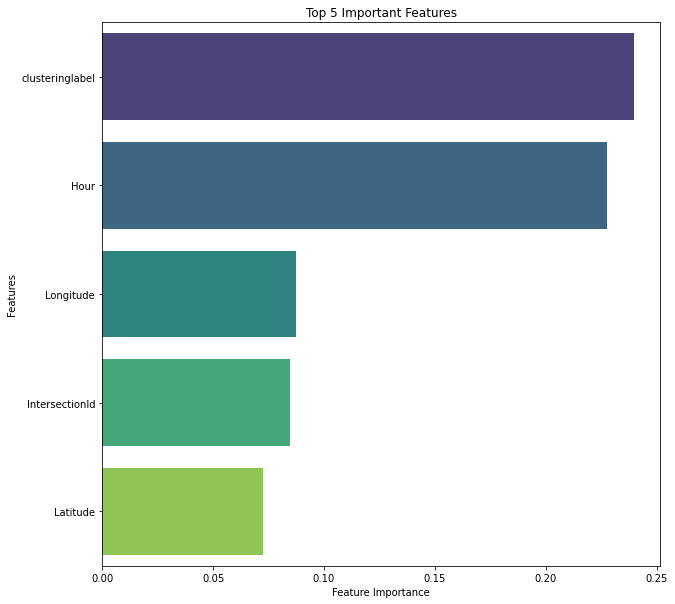

In [199]:
#Atlanta
clustering_plus_randomforest_with_feature_importance(Atlanta_X, Atlanta_y1)

RMSE:6.5260945318429915


/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


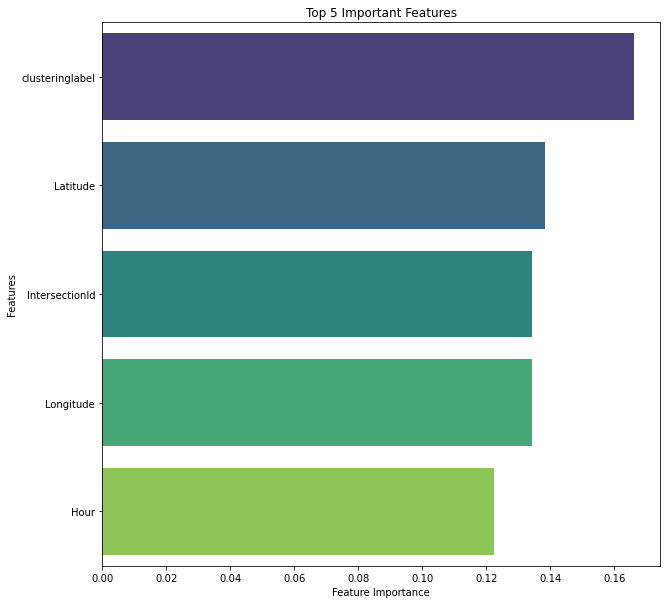

In [200]:
#Chicago
clustering_plus_randomforest_with_feature_importance(Chicago_X, Chicago_y1)

RMSE:5.083762473286585


/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


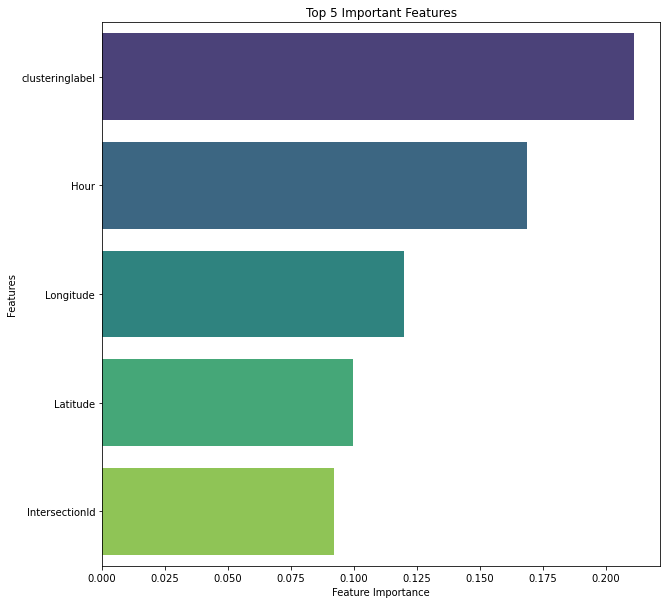

In [201]:
#Philadelphia
clustering_plus_randomforest_with_feature_importance(Philadelphia_X, Philadelphia_y1)

### Observation

The whole idea behind using clustering with regression is to highlight the significance of locations at a particular time of the day. For example, traffic congestion is bound to be significant in areas like Downtown during office hours. We expect density based clustering to identify clusters based on this. Considering this clustering label as a feature in random forest regressor should be helping the model performance. 

This implementation is justified as the added feature shows up as the most important feature of our model for every city. For complete evaluation and performance, we will obtain RMSE for all outcome variables and compare with baseline methods.

#### 6.h) Defining a method which incoorporates clustering with random forest regression and returns the RMSE value.

Here, we define a method which would:
\
i) Uses the clustering method to produce the cluster labels
\
ii) Uses th cluster labels with the input parameters to train a random forest regressor
\
iii) Returns the RMSE value

In [202]:
def clustering_plus_randomforest(X, Y):
    clustering_variables = ['Latitude', 'Longitude','Hour','Month']
    clustering_model_data = X.loc[:,clustering_variables]
    labels = clustering(clustering_model_data)
    X["clusteringlabel"] = labels
    
    #Creating the training and test sets
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    
    #Creating the random forest regressor object
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 23)

    #Fitting the regressor with training data
    regressor.fit(X_train, y_train)
    
    #Making predictions for the testing data
    y_pred = regressor.predict(X_validate)

    #Returning the RSME value
    return sqrt(mean_squared_error(y_validate, y_pred))

#### 6.i) Getting the RSME values for our proposed method for each city

In [203]:
#Boston
Boston_outcome = [Boston_y1,Boston_y2,Boston_y3,Boston_y4,Boston_y5,Boston_y6]
Boston_rmse = []
for i in range(len(Boston_outcome)):
    RMSE = clustering_plus_randomforest(Boston_X, Boston_outcome[i])
    Boston_rmse.append(RMSE)

In [204]:
#Atlanta
Atlanta_outcome = [Atlanta_y1,Atlanta_y2,Atlanta_y3,Atlanta_y4,Atlanta_y5,Atlanta_y6]
Atlanta_rmse = []
for i in range(len(Atlanta_outcome)):
    RMSE = clustering_plus_randomforest(Atlanta_X, Atlanta_outcome[i])
    Atlanta_rmse.append(RMSE)

In [205]:
#Chicago
Chicago_outcome = [Chicago_y1,Chicago_y2,Chicago_y3,Chicago_y4,Chicago_y5,Chicago_y6]
Chicago_rmse = []
for i in range(len(Chicago_outcome)):
    RMSE = clustering_plus_randomforest(Chicago_X, Chicago_outcome[i])
    Chicago_rmse.append(RMSE)

In [206]:
#Philadelphia    
Philadelphia_outcome = [Philadelphia_y1,Philadelphia_y2,Philadelphia_y3,Philadelphia_y4,Philadelphia_y5,Philadelphia_y6]
Philadelphia_rmse = []
for i in range(len(Philadelphia_outcome)):
    RMSE = clustering_plus_randomforest(Philadelphia_X, Philadelphia_outcome[i])
    Philadelphia_rmse.append(RMSE)    

#### 6.j) Adding RSME values for each city and creating the necessary plot

[6.370148548016179, 11.197254077937405, 18.82317034124862, 25.154462864151114, 50.26752136313581, 86.66250088619314]

Mean RMSE:  33.07917634678038


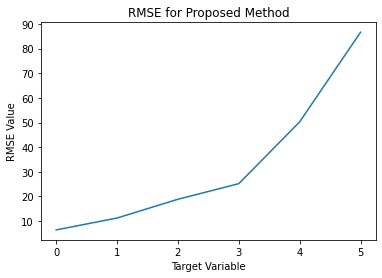

In [207]:
RMSE_new = []
for i in range(len(Boston_rmse)):
    RMSE = np.mean([Boston_rmse[i],Atlanta_rmse[i],Chicago_rmse[i],Philadelphia_rmse[i]])
    RMSE_new.append(RMSE)
print(RMSE_new)
print("\nMean RMSE: ", np.mean(RMSE_new))
plt.plot(RMSE_new)
plt.title('RMSE for Proposed Method')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()    

## 7) Evaluation

In the evaluation step, we create a line plot for the RMSE performance of both the baseline methods as well as our proposed method to see which performs the best


Mean RMSE for Baseline 1(Catboost):  44.38576067346284

Mean RMSE for Baseline 2(Random Forest):  39.959797879443634

Mean RMSE for Proposed Method:  33.07917634678038


<function matplotlib.pyplot.show(close=None, block=None)>

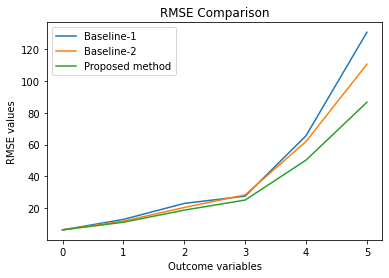

In [208]:
# Performance Comparison
plt.plot(RMSE_b1, label = 'Baseline-1')
plt.plot(RMSE_b2, label = 'Baseline-2')
plt.plot(RMSE_new, label = 'Proposed method')
plt.legend()
print("\nMean RMSE for Baseline 1(Catboost): ", np.mean(RMSE_b1))
print("\nMean RMSE for Baseline 2(Random Forest): ", np.mean(RMSE_b2))
print("\nMean RMSE for Proposed Method: ", np.mean(RMSE_new))
plt.title('RMSE Comparison')
plt.xlabel('Outcome variables')
plt.ylabel('RMSE values')
plt.show


# Observations:-

From the above graph, it is quite obvious that our custom model performs much better than two of the baseline models namely Catboost and Random Forest Regressor as the mean RMSE of our model is the smallest.

## References

1) https://www.kaggle.com/code/kabure/insightful-eda-modeling-lgbm-hyperopt/notebook
\
2) https://www.kaggle.com/code/pradeepmuniasamy/comparative-study-of-models-geotab-inertsection#Modelling 